In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk 



from matplotlib.colors import ListedColormap 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectFromModel

import statsmodels.api as sm

In [12]:
amazonstockdata = pd.read_csv ('AMZN.csv')
amazonstockdata.shape

(252, 7)

In [13]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
n=200

In [14]:
X = amazonstockdata.iloc [:n,0].values
X1=X
#x1= amazonstockdata.iloc [:n,8].values
y = amazonstockdata.iloc [:n,4].values
col_names=['date']


X=X.reshape(-1, 1)
encoder.fit(X)
X=encoder.transform(X)
data= pd.DataFrame(data=X,columns=col_names)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (data, y, test_size = 1/4, 
                                                     random_state = 0)

y_train

array([3217.01001 , 3138.379883, 3226.72998 , 3185.070068, 3262.129883,
       3161.02002 , 3284.719971, 3146.139893, 3294.620117, 3144.879883,
       3104.25    , 3118.060059, 3055.290039, 3225.      , 3328.22998 ,
       3105.459961, 3095.129883, 2977.570068, 3128.98999 , 3035.02002 ,
       3237.620117, 3131.060059, 3326.129883, 3203.530029, 3331.      ,
       3128.810059, 3156.969971, 3051.879883, 3312.48999 , 3342.879883,
       3299.300049, 3156.129883, 3232.580078, 3334.689941, 3116.419922,
       3195.689941, 3084.      , 3125.      , 3294.      , 3309.040039,
       3175.110107, 3008.909912, 3372.01001 , 3176.399902, 3362.02002 ,
       3046.26001 , 3110.870117, 3182.699951, 3117.02002 , 3236.080078,
       3057.159912, 3333.      , 2960.469971, 3200.      , 3099.399902,
       3165.120117, 3098.389893, 3286.649902, 3057.639893, 3149.840088,
       3272.709961, 2954.909912, 3008.72998 , 3143.73999 , 3033.530029,
       3094.530029, 3162.23999 , 3279.389893, 3292.22998 , 3167.

In [81]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

regr = MLPRegressor(random_state=1, max_iter=1000,activation='relu',hidden_layer_sizes=(200,200,200),batch_size=100).fit(X_train, y_train)

#regr.predict(X_test[:2])

regr.score(X_test, y_test)

-0.3732561542622741

In [82]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

prediction = regr.predict(X_test)

p=rmse(prediction,y_test)

p

138.3485962915655

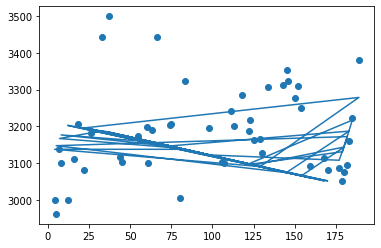

In [83]:
X_plot = X_test
y_plot= prediction
plt.plot(X_plot,y_plot)
plt.scatter(X_plot,y_test)
plt.show()

In [84]:
f=X1
f=np.append(f, np.array(['2021-07-10']), axis=0)

f=f.reshape(-1, 1)
encoder.fit(f)
f = encoder.transform(f)


regr.predict([f[len(f)-1]])

array([3448.2902703])